# 🔧 Multi-Tool Research Agent Demo

This notebook demonstrates using **multiple research tools** (ArXiv + Wikipedia) with different execution modes:
- **Sequential**: Tools run one after another
- **Parallel**: Tools run simultaneously

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

%load_ext autoreload
%autoreload 2

LLM_MODEL = "gpt-5-mini"

if not os.getenv("OPENAI_API_KEY"):
    raise ValueError("⚠️  OPENAI_API_KEY not found in .env file")

print("✅ Environment loaded")

✅ Environment loaded


In [2]:
cd ..

/Users/linafaik/Documents/projects/scientific-graph-agent


## Sequential Mode

**Flow**: `clarifier → arxiv_researcher → wikipedia_researcher → summarizer`

Tools execute one after another. Wikipedia receives papers from ArXiv and adds to them.

2025-11-26 15:45:34,072 - INFO - ✅ Map-reduce graph configured
2025-11-26 15:45:34,081 - INFO - ✅ Map-reduce graph configured
2025-11-26 15:45:34,090 - INFO - ✅ Graph configured with sequential execution: arxiv_researcher → wikipedia_researcher



Sequential Graph Structure:


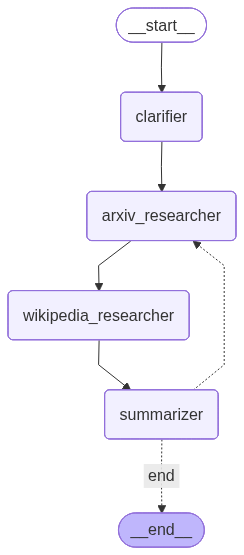

In [3]:
from src.agent_graph.graph import create_graph
from IPython.display import Image, display

# Create graph with both tools in sequential mode
graph_sequential = create_graph(
    with_checkpointer=False,
    tools=["arxiv", "wikipedia"],
    mode="sequential"
)

print("\nSequential Graph Structure:")
display(Image(graph_sequential.get_graph().draw_mermaid_png()))

In [4]:
import time

# Run with sequential execution
start_time_seq = time.time()
result_seq = graph_sequential.invoke({
    "query": "quantum computing applied to the machine learning field",
    "llm_model": LLM_MODEL,
    "max_papers": 3,
})
elapsed_time_seq = time.time() - start_time_seq

print("\n" + "="*80)
print("SEQUENTIAL MODE RESULTS")
print("="*80)
print(f"\n⏱️  Execution time: {elapsed_time_seq:.2f} seconds")
print(f"\nTotal papers: {len(result_seq['papers'])}")
print("\nSources:")
for paper in result_seq['papers']:
    source = paper.get('source', 'unknown')
    print(f"  [{source:10}] {paper['title'][:60]}...")

print(f"\n{result_seq['summary'][:300]}...")

2025-11-26 15:45:35,612 - INFO - Clarifying query: 'quantum computing applied to the machine learning field' (num_queries=1)
2025-11-26 15:45:43,240 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-26 15:45:43,286 - INFO - Refined query: 'quantum machine learning variational quantum algorithms quantum neural networks'
2025-11-26 15:45:43,289 - INFO - Searching ArXiv: 'quantum machine learning variational quantum algorithms quantum neural networks' (iteration 0)
2025-11-26 15:45:43,292 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=quantum+machine+learning+variational+quantum+algorithms+quantum+neural+networks&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=3
2025-11-26 15:45:44,565 - INFO - Got first page: 3 of 1260985 total results
2025-11-26 15:45:44,568 - INFO - Found 3 papers
2025-11-26 15:45:44,569 - INFO - Scoring paper relevance...
2025-11-26 15:45:48,135 - INFO - 


SEQUENTIAL MODE RESULTS

⏱️  Execution time: 61.46 seconds

Total papers: 4

Sources:
  [arxiv     ] QTN-VQC: An End-to-End Learning framework for Quantum Neural...
  [arxiv     ] Transfer learning in hybrid classical-quantum neural network...
  [arxiv     ] Quantum Learning with Noise and Decoherence: A Robust Quantu...
  [wikipedia ] Quantum optics...

## Résumé
• QTN-VQC proposes an end-to-end quantum neural network architecture that combines a trainable quantum tensor network (QTN) for embedding with a variational quantum circuit (VQC) to perform learning on NISQ devices; this design aims to improve expressive encoding of inputs while keeping ci...


2025-11-26 15:46:48,241 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=survey+quantum+machine+learning+algorithms+variational+models&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=2
2025-11-26 15:46:49,476 - INFO - Got first page: 2 of 1761382 total results


## Parallel Mode

**Flow**: `clarifier → [arxiv_researcher + wikipedia_researcher] → summarizer`

Both tools run simultaneously from clarifier, then results merge at summarizer.

2025-11-26 15:46:35,892 - INFO - ✅ Graph configured with parallel execution: arxiv_researcher, wikipedia_researcher



📊 Parallel Graph Structure:


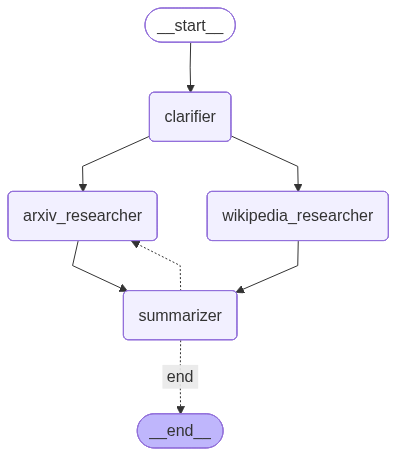

In [5]:
# Create graph with both tools in parallel mode
graph_parallel = create_graph(
    with_checkpointer=False,
    tools=["arxiv", "wikipedia"],
    mode="parallel"
)

print("\n📊 Parallel Graph Structure:")
display(Image(graph_parallel.get_graph().draw_mermaid_png()))

In [6]:
# Run with parallel execution
start_time_par = time.time()
result_par = graph_parallel.invoke({
    "query": "quantum computing applied to the machine learning field",
    "llm_model": LLM_MODEL,
    "max_papers": 3,
})
elapsed_time_par = time.time() - start_time_par

print("\n" + "="*80)
print("PARALLEL MODE RESULTS")
print("="*80)
print(f"\n⏱️  Execution time: {elapsed_time_par:.2f} seconds")
print(f"\nTotal papers: {len(result_par['papers'])}")
print("\nSources:")
for paper in result_par['papers']:
    source = paper.get('source', 'unknown')
    print(f"  [{source:10}] {paper['title'][:60]}...")

print(f"\n{result_par['summary'][:300]}...")

2025-11-26 15:46:36,004 - INFO - Clarifying query: 'quantum computing applied to the machine learning field' (num_queries=1)
2025-11-26 15:46:36,008 - INFO - Refined query: 'quantum machine learning variational quantum algorithms quantum neural networks'
2025-11-26 15:46:36,010 - INFO - Searching Wikipedia: 'quantum machine learning variational quantum algorithms quantum neural networks' (iteration 0)
2025-11-26 15:46:36,010 - INFO - Searching ArXiv: 'quantum machine learning variational quantum algorithms quantum neural networks' (iteration 0)
2025-11-26 15:46:36,012 - INFO - Requesting page (first: True, try: 0): https://export.arxiv.org/api/query?search_query=quantum+machine+learning+variational+quantum+algorithms+quantum+neural+networks&id_list=&sortBy=relevance&sortOrder=descending&start=0&max_results=3
2025-11-26 15:46:36,241 - INFO - Found Wikipedia article: Quantum optics
2025-11-26 15:46:36,244 - INFO -   📖 Quantum optics... - Score: 35
2025-11-26 15:46:36,425 - INFO - Got fir


PARALLEL MODE RESULTS

⏱️  Execution time: 0.45 seconds

Total papers: 4

Sources:
  [arxiv     ] QTN-VQC: An End-to-End Learning framework for Quantum Neural...
  [arxiv     ] Transfer learning in hybrid classical-quantum neural network...
  [arxiv     ] Quantum Learning with Noise and Decoherence: A Robust Quantu...
  [wikipedia ] Quantum optics...

## Résumé
• QTN-VQC proposes an end-to-end quantum neural network architecture that combines a trainable quantum tensor network (QTN) for embedding with a variational quantum circuit (VQC) to perform learning on NISQ devices; this design aims to improve expressive encoding of inputs while keeping ci...


## Comparison

Both modes produce similar results, but:
- **Sequential**: Wikipedia node sees ArXiv papers in state
- **Parallel**: Each tool starts with empty papers list, all merge at summarizer
- **Parallel** can be faster when tools take significant time

In [7]:
print("📊 Mode Comparison:")
print(f"\n  Sequential:")
print(f"    - Papers: {len(result_seq['papers'])}")
print(f"    - Time:   {elapsed_time_seq:.2f}s")
print(f"\n  Parallel:")
print(f"    - Papers: {len(result_par['papers'])}")
print(f"    - Time:   {elapsed_time_par:.2f}s")
print(f"\n  ⚡ Speedup: {elapsed_time_seq/elapsed_time_par:.2f}x faster with parallel execution")

📊 Mode Comparison:

  Sequential:
    - Papers: 4
    - Time:   61.46s

  Parallel:
    - Papers: 4
    - Time:   0.45s

  ⚡ Speedup: 137.10x faster with parallel execution


## Map-Reduce Mode (Multi-Query)

**Flow**: `clarifier → [arxiv_1, arxiv_2, arxiv_3] → summarizer`

The clarifier generates **3 diverse queries** that approach the topic from different angles, then each query runs its own ArXiv search in parallel. All results are merged and summarized together.

This provides better coverage by exploring multiple perspectives of the same question.

2025-11-26 15:46:36,497 - INFO - ✅ Map-reduce graph configured



🗺️  Map-Reduce Graph Structure:


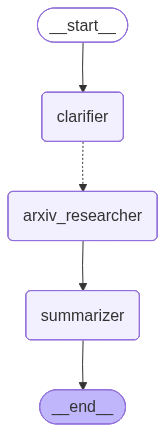

In [8]:
from src.agent_graph.graph import create_map_reduce_graph

# Create map-reduce graph
graph_map_reduce = create_map_reduce_graph(with_checkpointer=False)

print("\n🗺️  Map-Reduce Graph Structure:")
display(Image(graph_map_reduce.get_graph().draw_mermaid_png()))

In [9]:
# Run with map-reduce execution (3 queries × 2 papers each)
start_time_mr = time.time()
result_mr = graph_map_reduce.invoke({
    "query": "quantum computing applied to the machine learning field",
    "llm_model": LLM_MODEL,
    "num_queries": 3,  # Generate 3 different search queries
    "max_papers": 2,   # Each query fetches 2 papers (total: ~6 papers)
})
elapsed_time_mr = time.time() - start_time_mr

print("\n" + "="*80)
print("MAP-REDUCE MODE RESULTS")
print("="*80)
print(f"\n⏱️  Execution time: {elapsed_time_mr:.2f} seconds")
print(f"\nTotal papers found: {len(result_mr['papers'])}")

print("\nPapers by relevance score:")
for i, paper in enumerate(result_mr['papers'][:10], 1):
    score = paper.get('relevance_score', 0)
    print(f"  {i}. [{score:3d}] {paper['title'][:65]}...")

print(f"\n{result_mr['summary'][:400]}...")

2025-11-26 15:46:36,598 - INFO - Clarifying query: 'quantum computing applied to the machine learning field' (num_queries=3)
2025-11-26 15:46:48,212 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-26 15:46:48,230 - INFO - Generated 3 refined queries:
2025-11-26 15:46:48,230 - INFO -   1. survey quantum machine learning algorithms variational models
2025-11-26 15:46:48,230 - INFO -   2. quantum kernel methods support vector machines classification
2025-11-26 15:46:48,231 - INFO -   3. quantum computing hardware implementations for machine learning
2025-11-26 15:46:48,238 - INFO - Searching ArXiv: 'survey quantum machine learning algorithms variational models' (iteration 0)
2025-11-26 15:46:48,239 - INFO - Searching ArXiv: 'quantum computing hardware implementations for machine learning' (iteration 0)
2025-11-26 15:46:48,239 - INFO - Searching ArXiv: 'quantum kernel methods support vector machines classification' (iteration 0)
2025-11-26 1


MAP-REDUCE MODE RESULTS

⏱️  Execution time: 45.66 seconds

Total papers found: 5

Papers by relevance score:
  1. [ 10] Learning Curves for Decision Making in Supervised Machine Learnin...
  2. [  5] Support Vector Machine Guided Reproducing Kernel Particle Method ...
  3. [  5] An Equivalence between the Lasso and Support Vector Machines...
  4. [  5] DOME: Recommendations for supervised machine learning validation ...
  5. [  3] Changing Data Sources in the Age of Machine Learning for Official...

## Résumé
• Learning curves are a practical tool to predict how performance scales with resources (e.g., training examples or iterations) and to guide data acquisition and early stopping decisions in supervised learning [Paper 1].  
• Support Vector Machines are effective in application-driven tasks such as image-based discretization of microstructures, and conceptually SVM optimization problems c...


### Full Summary

In [10]:
from IPython.display import Markdown

print(result_mr['summary'])

## Résumé
• Learning curves are a practical tool to predict how performance scales with resources (e.g., training examples or iterations) and to guide data acquisition and early stopping decisions in supervised learning [Paper 1].  
• Support Vector Machines are effective in application-driven tasks such as image-based discretization of microstructures, and conceptually SVM optimization problems can be transformed into Lasso instances, enabling transfer of solvers and theoretical insights between classification and sparse regression [Paper 2, Paper 3].  
• Domain-focused guidance emphasizes rigorous validation, transparent methods and attention to changing data sources; these practices are essential to ensure reliable ML in sensitive fields like biology and official statistics [Paper 4, Paper 5].  
• Notably, none of the provided papers address quantum computing for machine learning; they concern classical ML methods, so for quantum ML applications you should consult dedicated quantum‑

## Final Comparison

Comparison of all three modes:

In [11]:
print("📊 Complete Mode Comparison:")
print("\n  Sequential (ArXiv + Wikipedia):")
print(f"    - Papers: {len(result_seq['papers'])}")
print(f"    - Time:   {elapsed_time_seq:.2f}s")
print("    - Strategy: Single query, multiple tools")

print("\n  Parallel (ArXiv + Wikipedia):")
print(f"    - Papers: {len(result_par['papers'])}")
print(f"    - Time:   {elapsed_time_par:.2f}s")
print("    - Strategy: Single query, multiple tools run simultaneously")

print("\n  Map-Reduce (3 queries × ArXiv):")
print(f"    - Papers: {len(result_mr['papers'])}")
print(f"    - Time:   {elapsed_time_mr:.2f}s")
print("    - Strategy: Multiple diverse queries, parallel searches")

print("\n💡 Key Insights:")
print("  - Parallel mode is faster than sequential for multi-tool")
print("  - Map-reduce provides broader coverage with diverse queries")
print("  - Map-reduce automatically deduplicates and ranks by relevance")

📊 Complete Mode Comparison:

  Sequential (ArXiv + Wikipedia):
    - Papers: 4
    - Time:   61.46s
    - Strategy: Single query, multiple tools

  Parallel (ArXiv + Wikipedia):
    - Papers: 4
    - Time:   0.45s
    - Strategy: Single query, multiple tools run simultaneously

  Map-Reduce (3 queries × ArXiv):
    - Papers: 5
    - Time:   45.66s
    - Strategy: Multiple diverse queries, parallel searches

💡 Key Insights:
  - Parallel mode is faster than sequential for multi-tool
  - Map-reduce provides broader coverage with diverse queries
  - Map-reduce automatically deduplicates and ranks by relevance
